In [1]:
import sys
import os
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, display # NOTE: will require ffmpeg installation
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import rioxarray
from shapely.geometry import mapping
from eofs.xarray import Eof
from xarrayutils.utils import linear_trend
import gc
import collections
import statsmodels.api as sm
import scipy

In [2]:
# Define project repo path
inDirName = '/Users/smurugan9/research/aislens/aislens_emulation/'

# DATA FILE PATHS

# Data containing regridded flux and SSH for 150 years
regriddedFluxSSH_filepath = 'data/interim/RegriddedFluxSSH.nc'

# File contains all defined ice shelves
iceShelvesShape_filepath = 'data/interim/iceShelves.geojson'

# Folder for output figures
figures_folderpath = 'reports/figures/' 

interim_data_folder = 'data/interim/'
flux_dedrafted_data_path = 'dedrafted_flux_IMBIE/'
randomized_realizations_path = 'randomized_realizations/'
flux_dedrafted_iceshelves_data_path = 'iceshelves_dedrafted_flux/'
reconstructions_neofs_path = 'reconstructions_neofs/'

In [3]:
data = xr.open_dataset(inDirName + regriddedFluxSSH_filepath)
flux = data.timeMonthly_avg_landIceFreshwaterFlux
ssh = data.timeMonthly_avg_ssh

# Read geoJSON region feature file as GeoDataFrame
iceshelvesmask = gpd.read_file(inDirName + iceShelvesShape_filepath)
# Convert to south polar stereographic projection
icems = iceshelvesmask.to_crs({'init': 'epsg:3031'});
crs = ccrs.SouthPolarStereo();
# Specify projection for data file
data.rio.write_crs("epsg:3031",inplace=True);
# Specify projection for data file flux array
flux.rio.write_crs("epsg:3031",inplace=True);

/Users/smurugan9/opt/anaconda3/envs/aislens/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [4]:
iceshelves_dedrafted_total = xr.open_dataset(inDirName+
                                             interim_data_folder+
                                             flux_dedrafted_iceshelves_data_path+
                                             'iceshelves_dedrafted_total.nc')

In [5]:
flux_clean = xr.open_dataset(inDirName+interim_data_folder+'flux_clean')
flux_clean = flux_clean.timeMonthly_avg_landIceFreshwaterFlux

In [6]:
%%time
##############################
#### EOF/PCA DECOMPOSITION ### 
##############################

fluxsolver = Eof(flux_clean) # using eof.xarray interface

# Define EOFs and PCs
fluxeofs = fluxsolver.eofs()
fluxpcs = fluxsolver.pcs()

CPU times: user 2min 29s, sys: 1min 8s, total: 3min 37s
Wall time: 1min 13s


In [7]:
%%time
##############################
# FOURIER PHASE RANDOMIZATION 
##############################

# Define number of random Fourier realizations
n_realizations = 1
t_length = fluxpcs.shape[0]

# fluxpcs[:,i] when using PCA outputs
new_fl = np.empty((n_realizations,fluxpcs.shape[0],fluxpcs.shape[1]))

# Time limits for plotting
t1 = 0
tf = int(t_length/2)

for i in range(n_realizations):
    for m in range(fluxsolver.neofs):
        fl = fluxpcs[:,m] # fluxpcs[:,i] when using PCA outputs
        fl_fourier = np.fft.rfft(fl)
        random_phases = np.exp(np.random.uniform(0,2*np.pi,int(len(fl)/2+1))*1.0j)
        fl_fourier_new = fl_fourier*random_phases
        new_fl[i,:,m] = np.fft.irfft(fl_fourier_new)
        print('calculated ifft for realization {}'.format(i))
        # plt.plot(new_fl[i,t1:tf],'b', linewidth=0.15) # PLOT LATER! Plotting here adds significant computation time

calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated iff

calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated iff

calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated iff

calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated ifft for realization 0
calculated iff

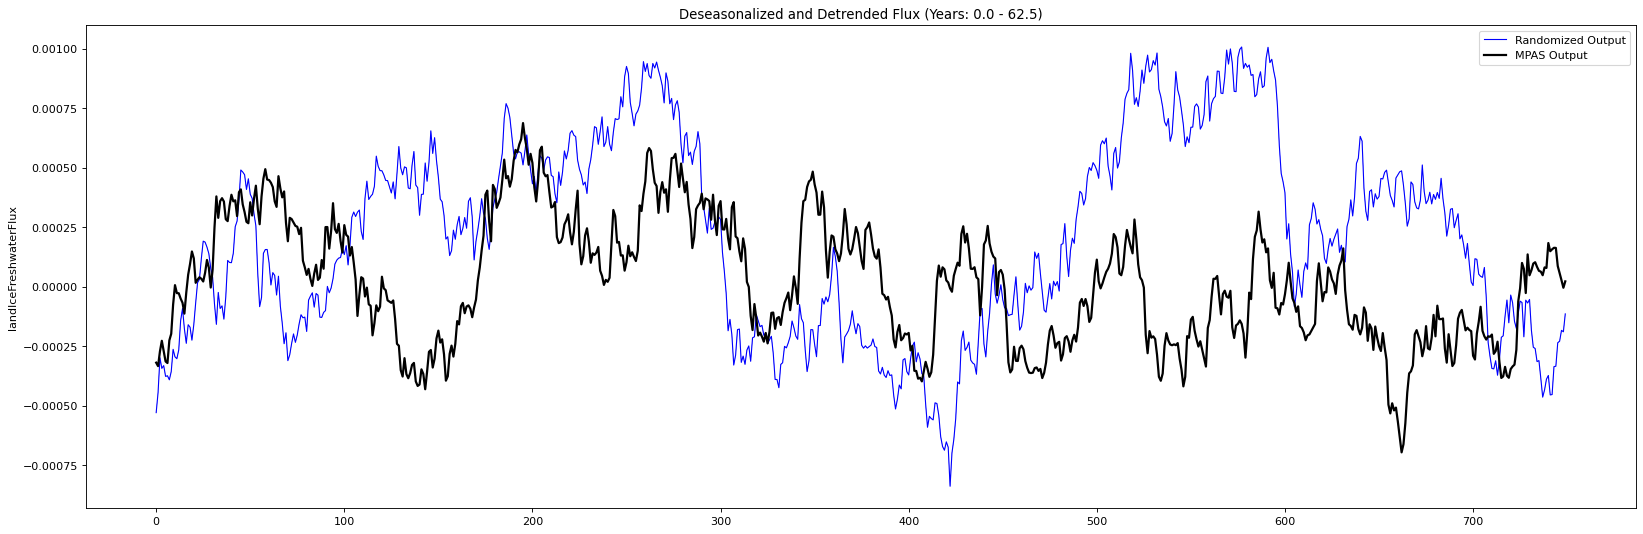

In [10]:
# ======================================================
# PHASE RANDOMIZED TIME SERIES PLOTS (PCs) =============
# ======================================================

plt.figure(figsize=(25, 8), dpi=80)

for i in range(n_realizations):
    plt.plot(new_fl[i,t1:tf,1],'b', linewidth=0.15)

plt.plot(new_fl[0,t1:tf,1],'b', linewidth=1, label='Randomized Output')
plt.plot(fluxpcs[t1:tf,1],'k', linewidth=2, label='MPAS Output')
plt.title('Deseasonalized and Detrended Flux (Years: {:.1f} - {:.1f})'.
          format((t1)/12,(tf)/12))
plt.ylabel('landIceFreshwaterFlux')
plt.legend()

In [11]:
# Helper function for reconstruction
def _valid_nan(in_array):
    inan = np.isnan(in_array)
    return (inan.any(axis=0) == inan.all(axis=0)).all()

In [12]:
%%time
### Reconstruct field: code optimized
# Store the input data in an instance variable.
if flux_clean.ndim < 2:
    raise ValueError('the input data set must be at least two dimensional')
_data = flux_clean.to_numpy().copy()
# Check if the input is a masked array. If so fill it with NaN.
try:
    _data = _data.filled(fill_value=np.nan)
    _filled = True
except AttributeError:
    _filled = False
# Store information about the shape/size of the input data.
_records = _data.shape[0]
_originalshape = _data.shape[1:]
channels = np.product(_originalshape)
# Remove the time mean of the input data unless explicitly told
# not to by the "center" argument.
# Reshape to two dimensions (time, space) creating the design matrix.
_data = _data.reshape([_records, channels])
# Find the indices of values that are not missing in one row. All the
# rows will have missing values in the same places provided the
# array was centered. If it wasn't then it is possible that some
# missing values will be missed and the singular value decomposition
# will produce not a number for everything.
if not _valid_nan(_data):
    raise ValueError('missing values detected in different '
                     'locations at different times')
nonMissingIndex = np.where(np.logical_not(np.isnan(_data[0])))[0]
# Remove missing values from the design matrix.
dataNoMissing = _data[:, nonMissingIndex]
if dataNoMissing.size == 0:
    raise ValueError('all input data is missing')
# Compute the singular value decomposition of the design matrix.
try:
    A, Lh, E = np.linalg.svd(dataNoMissing, full_matrices=False)
except (np.linalg.LinAlgError, ValueError):
    raise ValueError('error encountered in SVD, check that missing '
                     'values are in the same places at each time and '
                     'that all the values are not missing')
# Singular values are the square-root of the eigenvalues of the
# covariance matrix. Construct the eigenvalues appropriately and
# normalize by N-ddof where N is the number of observations. This
# corresponds to the eigenvalues of the normalized covariance matrix.
_ddof = 1 # defaults to 1
normfactor = float(_records - _ddof)
_L = Lh * Lh / normfactor
# Store the number of eigenvalues (and hence EOFs) that were actually
# computed.
neofs = len(_L)
# Re-introduce missing values into the eigenvectors in the same places
# as they exist in the input maps. Create an array of not-a-numbers
# and then introduce data values where required. We have to use the
# astype method to ensure the eigenvectors are the same type as the
# input dataset since multiplication by np.NaN will promote to 64-bit.
_flatE = np.ones([neofs, channels],
                      dtype=_data.dtype) * np.NaN
_flatE = _flatE.astype(_data.dtype)
_flatE[:, nonMissingIndex] = E
# Remove the scaling on the principal component time-series that is
# implicitily introduced by using SVD instead of eigen-decomposition.
# The PCs may be re-scaled later if required.
#_P = A * Lh

CPU times: user 2min 30s, sys: 56.1 s, total: 3min 26s
Wall time: 57.6 s


In [ ]:
%%time

####################
# EOF RECONSTRUCTION : REMOVE 1ST EOF (AMERY)
####################

for neofs_chosen in (1100,1200,1300,1400,1500,1600,1700):
    for i in range(1):
        fluxpcs_new = xr.DataArray(new_fl[i], 
                                   coords=fluxpcs.coords, 
                                   dims = fluxpcs.dims, 
                                   attrs=fluxpcs.attrs)
        _P = fluxpcs_new.to_numpy()
        if isinstance(neofs, collections.abc.Iterable):
            modes = [m - 1 for m in neofs_chosen]
        else:
            modes = slice(0, neofs_chosen)
        # Project principal components onto the EOFs to compute the
        # reconstructed field.
        print('Calculating data for realization #{}'.format(i))
        rval = np.dot(_P[:, modes], _flatE[modes])
        # Reshape the reconstructed field so it has the same shape as the
        # input data set.
        rval = rval.reshape((_records,) + _originalshape)

        # Return the reconstructed field.
        if _filled:
            rval = ma.array(rval, mask=np.where(np.isnan(rval), True, False))

        reconstr_full = xr.DataArray(rval, 
                                     dims = flux_clean.dims, 
                                     coords = flux_clean.coords, 
                                     attrs = flux_clean.attrs)
        reconstr_full = reconstr_full.rename('timeMonthly_avg_landIceFreshwaterFlux')
        print('Reconstructed data for realization #{}'.format(i))    
        # Save reconstructed realization
        reconstr_full.to_netcdf(inDirName+
                                interim_data_folder+
                                reconstructions_neofs_path+
                                'Resid_randomized_flux_EOFremoved_n_{}'.
                                format(neofs_chosen))
        print('Saved datafile for realization #{}'.format(i))
        del fluxpcs_new, _P, modes, rval, reconstr_full 
        print('deleting interim variables')
        gc.collect()

In [ ]:
reconstr_full = xr.open_dataset(inDirName+
                                interim_data_folder+
                                reconstructions_neofs_path+
                                'Resid_randomized_flux_EOFremoved_n_{}'.
                                format(0))
flux_reconstr = reconstr_full.timeMonthly_avg_landIceFreshwaterFlux

In [ ]:
reconstr_full1 = xr.open_dataset(inDirName+
                                interim_data_folder+
                                reconstructions_neofs_path+
                                'Resid_randomized_flux_EOFremoved_n_{}'.
                                format(100))
flux_reconstr1 = reconstr_full1.timeMonthly_avg_landIceFreshwaterFlux

reconstr_full2 = xr.open_dataset(inDirName+
                                interim_data_folder+
                                reconstructions_neofs_path+
                                'Resid_randomized_flux_EOFremoved_n_{}'.
                                format(200))
flux_reconstr2 = reconstr_full2.timeMonthly_avg_landIceFreshwaterFlux

reconstr_full3 = xr.open_dataset(inDirName+
                                interim_data_folder+
                                reconstructions_neofs_path+
                                'Resid_randomized_flux_EOFremoved_n_{}'.
                                format(300))
flux_reconstr3 = reconstr_full3.timeMonthly_avg_landIceFreshwaterFlux

reconstr_full4 = xr.open_dataset(inDirName+
                                interim_data_folder+
                                reconstructions_neofs_path+
                                'Resid_randomized_flux_EOFremoved_n_{}'.
                                format(400))
flux_reconstr4 = reconstr_full4.timeMonthly_avg_landIceFreshwaterFlux

reconstr_full5 = xr.open_dataset(inDirName+
                                interim_data_folder+
                                reconstructions_neofs_path+
                                'Resid_randomized_flux_EOFremoved_n_{}'.
                                format(500))
flux_reconstr5 = reconstr_full5.timeMonthly_avg_landIceFreshwaterFlux

reconstr_full6 = xr.open_dataset(inDirName+
                                interim_data_folder+
                                reconstructions_neofs_path+
                                'Resid_randomized_flux_EOFremoved_n_{}'.
                                format(600))
flux_reconstr6 = reconstr_full6.timeMonthly_avg_landIceFreshwaterFlux

reconstr_full7 = xr.open_dataset(inDirName+
                                interim_data_folder+
                                reconstructions_neofs_path+
                                'Resid_randomized_flux_EOFremoved_n_{}'.
                                format(700))
flux_reconstr7 = reconstr_full7.timeMonthly_avg_landIceFreshwaterFlux

reconstr_full8 = xr.open_dataset(inDirName+
                                interim_data_folder+
                                reconstructions_neofs_path+
                                'Resid_randomized_flux_EOFremoved_n_{}'.
                                format(800))
flux_reconstr8 = reconstr_full8.timeMonthly_avg_landIceFreshwaterFlux

reconstr_full9 = xr.open_dataset(inDirName+
                                interim_data_folder+
                                reconstructions_neofs_path+
                                'Resid_randomized_flux_EOFremoved_n_{}'.
                                format(900))
flux_reconstr9 = reconstr_full9.timeMonthly_avg_landIceFreshwaterFlux

reconstr_full10 = xr.open_dataset(inDirName+
                                interim_data_folder+
                                reconstructions_neofs_path+
                                'Resid_randomized_flux_EOFremoved_n_{}'.
                                format(1000))
flux_reconstr10 = reconstr_full10.timeMonthly_avg_landIceFreshwaterFlux

In [ ]:
basin = 104
flux_clean.rio.write_crs("epsg:3031",inplace=True);
orig_basin = flux_clean.rio.clip(icems.
                                   loc[[basin],'geometry'].
                                   apply(mapping),icems.crs,drop=False)
# Remove NaN mask values to 'zoom' into catchment region
orig_basin = orig_basin.dropna('time',how='all')
orig_basin = orig_basin.dropna('y',how='all')
orig_basin = orig_basin.dropna('x',how='all')
orig_basin = orig_basin.drop("month")

In [ ]:
# Choose basin/catchment for plotting
basin = 104

# Mask data to chosen basin: 
# original input data and reconstructed data (from selected realization)

flux_reconstr1.rio.write_crs("epsg:3031",inplace=True);
flux_reconstr2.rio.write_crs("epsg:3031",inplace=True);
flux_reconstr3.rio.write_crs("epsg:3031",inplace=True);
flux_reconstr4.rio.write_crs("epsg:3031",inplace=True);
flux_reconstr5.rio.write_crs("epsg:3031",inplace=True);
flux_reconstr6.rio.write_crs("epsg:3031",inplace=True);
flux_reconstr7.rio.write_crs("epsg:3031",inplace=True);
flux_reconstr8.rio.write_crs("epsg:3031",inplace=True);
flux_reconstr9.rio.write_crs("epsg:3031",inplace=True);
flux_reconstr10.rio.write_crs("epsg:3031",inplace=True);

rec_basin1 = flux_reconstr1.rio.clip(icems.loc[[basin],'geometry'].apply(mapping),icems.crs,drop=False)
rec_basin2 = flux_reconstr2.rio.clip(icems.loc[[basin],'geometry'].apply(mapping),icems.crs,drop=False)
rec_basin3 = flux_reconstr3.rio.clip(icems.loc[[basin],'geometry'].apply(mapping),icems.crs,drop=False)
rec_basin4 = flux_reconstr4.rio.clip(icems.loc[[basin],'geometry'].apply(mapping),icems.crs,drop=False)
rec_basin5 = flux_reconstr5.rio.clip(icems.loc[[basin],'geometry'].apply(mapping),icems.crs,drop=False)
rec_basin6 = flux_reconstr6.rio.clip(icems.loc[[basin],'geometry'].apply(mapping),icems.crs,drop=False)
rec_basin7 = flux_reconstr7.rio.clip(icems.loc[[basin],'geometry'].apply(mapping),icems.crs,drop=False)
rec_basin8 = flux_reconstr8.rio.clip(icems.loc[[basin],'geometry'].apply(mapping),icems.crs,drop=False)
rec_basin9 = flux_reconstr9.rio.clip(icems.loc[[basin],'geometry'].apply(mapping),icems.crs,drop=False)
rec_basin10 = flux_reconstr10.rio.clip(icems.loc[[basin],'geometry'].apply(mapping),icems.crs,drop=False)

# Remove NaN mask values to 'zoom' into catchment region
rec_basin1 = rec_basin1.dropna('time',how='all')
rec_basin1 = rec_basin1.dropna('y',how='all')
rec_basin1 = rec_basin1.dropna('x',how='all')
rec_basin1 = rec_basin1.drop("month")


rec_basin2 = rec_basin2.dropna('time',how='all')
rec_basin2 = rec_basin2.dropna('y',how='all')
rec_basin2 = rec_basin2.dropna('x',how='all')
rec_basin2 = rec_basin2.drop("month")

rec_basin3 = rec_basin3.dropna('time',how='all')
rec_basin3 = rec_basin3.dropna('y',how='all')
rec_basin3 = rec_basin3.dropna('x',how='all')
rec_basin3 = rec_basin3.drop("month")

rec_basin4 = rec_basin4.dropna('time',how='all')
rec_basin4 = rec_basin4.dropna('y',how='all')
rec_basin4 = rec_basin4.dropna('x',how='all')
rec_basin4 = rec_basin4.drop("month")

rec_basin5 = rec_basin5.dropna('time',how='all')
rec_basin5 = rec_basin5.dropna('y',how='all')
rec_basin5 = rec_basin5.dropna('x',how='all')
rec_basin5 = rec_basin5.drop("month")

rec_basin6 = rec_basin6.dropna('time',how='all')
rec_basin6 = rec_basin6.dropna('y',how='all')
rec_basin6 = rec_basin6.dropna('x',how='all')
rec_basin6 = rec_basin6.drop("month")

rec_basin7 = rec_basin7.dropna('time',how='all')
rec_basin7 = rec_basin7.dropna('y',how='all')
rec_basin7 = rec_basin7.dropna('x',how='all')
rec_basin7 = rec_basin7.drop("month")

rec_basin8 = rec_basin8.dropna('time',how='all')
rec_basin8 = rec_basin8.dropna('y',how='all')
rec_basin8 = rec_basin8.dropna('x',how='all')
rec_basin8 = rec_basin8.drop("month")

rec_basin10 = rec_basin10.dropna('time',how='all')
rec_basin10 = rec_basin10.dropna('y',how='all')
rec_basin10 = rec_basin10.dropna('x',how='all')
rec_basin10 = rec_basin10.drop("month")

rec_basin9 = rec_basin9.dropna('time',how='all')
rec_basin9 = rec_basin9.dropna('y',how='all')
rec_basin9 = rec_basin9.dropna('x',how='all')
rec_basin9 = rec_basin9.drop("month")

In [ ]:
orig_basin_ts = orig_basin.sum(['y','x'])

rec_basin1_ts = rec_basin1.sum(['y','x'])
rec_basin2_ts = rec_basin2.sum(['y','x'])
rec_basin3_ts = rec_basin3.sum(['y','x'])
rec_basin4_ts = rec_basin4.sum(['y','x'])
rec_basin5_ts = rec_basin5.sum(['y','x'])
rec_basin6_ts = rec_basin6.sum(['y','x'])
rec_basin7_ts = rec_basin7.sum(['y','x'])
rec_basin8_ts = rec_basin8.sum(['y','x'])
rec_basin9_ts = rec_basin9.sum(['y','x'])
rec_basin10_ts = rec_basin10.sum(['y','x'])

In [ ]:
plt.figure(figsize=(25, 8), dpi=80)

t1 = 0
tf = 1000

plt.plot(orig_basin_ts[t1:tf], 'k', linewidth=2, label = 'Model Data')
plt.plot(rec_basin1_ts[t1:tf],  'b', linewidth=1, label = 'Emulator Output')
plt.plot(rec_basin2_ts[t1:tf],  'b', linewidth=1)
plt.plot(rec_basin3_ts[t1:tf],  'b', linewidth=1)
plt.plot(rec_basin4_ts[t1:tf],  'b', linewidth=1)
plt.plot(rec_basin5_ts[t1:tf],  'b', linewidth=1)
plt.plot(rec_basin6_ts[t1:tf],  'b', linewidth=1)
plt.plot(rec_basin7_ts[t1:tf],  'b', linewidth=1)
plt.plot(rec_basin8_ts[t1:tf],  'b', linewidth=1)
plt.plot(rec_basin9_ts[t1:tf],  'b', linewidth=1)
plt.plot(rec_basin10_ts[t1:tf],  'b', linewidth=1)

plt.legend()

In [ ]:
plt.figure(figsize=(25,8))
plt.psd(orig_basin_ts,label='Original', linewidth=3, color='k')
plt.psd(rec_basin1_ts, color = 'b')
plt.psd(rec_basin2_ts)
plt.psd(rec_basin3_ts)
plt.psd(rec_basin4_ts)
plt.psd(rec_basin5_ts)
plt.psd(rec_basin6_ts)
plt.psd(rec_basin7_ts)
plt.psd(rec_basin8_ts)
plt.psd(rec_basin9_ts)
plt.psd(rec_basin10_ts)
plt.title('PSD of original and reconstructed data: {}'.format(icems.name.values[basin]))
plt.legend()

In [ ]:
recbasin_ts = xr.concat([rec_basin1_ts,rec_basin2_ts,rec_basin3_ts,
                        rec_basin4_ts,rec_basin5_ts,rec_basin6_ts,
                        rec_basin7_ts,rec_basin8_ts,rec_basin9_ts,
                        rec_basin10_ts],dim="recmode")

In [ ]:
corrvals = np.array([])
for i in range(0,10):
    val = xr.corr(orig_basin_ts,recbasin_ts[i])
    corrvals = np.append(corrvals,val)

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(corrvals)